<a href="https://colab.research.google.com/github/massaoiwanaga/topespsi/blob/main/TESI_VAC_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Disciplina Topicos Especiais em Sistemas de Informação I**

---

## **Saúde (COVID-19)**

> Alessandra Pierro Saraiva
>
> Fabiane Monteiro Carvalho
>
> Massao Oliveira Iwanaga

In [ ]:
# Testado no ambiente Google Colab - 1.0.0
# Python 3.7.10 
#
# Bibliotecas utilizadas:
#  numpy 1.19.5
#  pandas 1.1.5
#  matplotlib 3.2.2
#  pandas_profiling 1.4.1
#  prov 2.0.0
#  IPython 5.5.0

## Importando a biblioteca pandas

In [3]:
# importando a biblioteca
import pandas as pd # pandas
import numpy as np  # numpy
import matplotlib.pyplot as plt                # importar a biblioteca matplotlib
import pandas_profiling

## Instalação da biblioteca PROV

In [ ]:
#Instalação da biblioteca PROV no ambiente COLAB
#Essa biblioteca implementa em Python o Modelo de Dados PROV da W3C
!pip install prov

     |████████████████████████████████| 430kB 18.2MB/s 
     |████████████████████████████████| 235kB 41.4MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 


## Acessar dados do Google Drive

In [5]:
# Se você está executando o notebook no Google Colab, é necessário montar o drive para o ambiente virtual do Google Drive
# Clicar no link que aparecerá e será gerada uma chave, que deverá ser colada no campo "Autorization code"

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Informações de proveniência

In [ ]:
# Working with PROV

import sys, subprocess, datetime, random
from prov.model import ProvDocument                                                 #PROV Library


In [ ]:
# Retrospective Provenance variables
agent    = input("Enter the name of the AGENT WHO is running the program: ")        #PROV-Agent
entity   = input("Enter the name of the ENTITY dataset1: ")                          #PROV-Entity
activity = input("Enter the name of the ACTIVITY1: ")                                #PROV-Activity
entity2   = input("Enter the name of the ENTITY dataset2: ")                          #PROV-Entity
activity2 = input("Enter the name of the ACTIVITY2: ")                                #PROV-Activity
activity3 = input("Enter the name of the ACTIVITY3: ")                                #PROV-Activity
graph = entity                                                                       #PROV-Graph
graph = entity2                                                                      #PROV-Graph

Enter the name of the AGENT WHO is running the program: Alessandra-Fabiane-Massao
Enter the name of the ENTITY dataset1: Vacinação
Enter the name of the ACTIVITY1: Leitura
Enter the name of the ENTITY dataset2: CNES
Enter the name of the ACTIVITY2: Análise_e_Tratamento_de_Dados
Enter the name of the ACTIVITY3: Visualização_dos_Dados


In [ ]:
### BEGIN - Registering Retrospective Provenance -             #PROV-MODEL

# Creating an empty provenance document
d1 = ProvDocument()                                                 

In [ ]:
# Declaring namespaces for various prefixes used in the excution of the experiment
d1.add_namespace('dados.gov.br', 'https://dados.gov.br/dataset/covid-19-vacinacao/')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('greco', 'http://www.ufrj.br/ppgi/greco/#')
d1.add_namespace('dados.gov.br', 'https://dados.gov.br/dataset/cnes_ativo')

# Adding entities
entity = "dados.gov.br:"+ entity
e1 = d1.entity(entity)

entity2 = "dados.gov.br:"+ entity2
e2 = d1.entity(entity2)

# Adding an Agent 
agent = "foaf:"+ agent
d1.agent(agent)

# Attributing the execution of the experiment to the PROV-Agent
d1.wasAttributedTo(e1, agent)
d1.wasAttributedTo(e2, agent)

# Adding activities
activity = "greco:"+ activity
d1.activity(activity)

activity2 = "greco:"+ activity2
d1.activity(activity2)

activity3 = "greco:"+ activity3
d1.activity(activity3)

# Generation
d1.wasGeneratedBy( entity, activity)
d1.wasGeneratedBy( entity2, activity)
d1.wasGeneratedBy( entity, activity2)
d1.wasGeneratedBy( entity2, activity2)
d1.wasGeneratedBy( entity, activity3)
d1.wasGeneratedBy( entity2, activity3)

<ProvGeneration: (dados.gov.br:CNES, greco:Visualização_dos_Dados)>

In [ ]:
# Adding a role to the PROV-Agent and timestamp to dataset
d1.agent(agent, {'prov:hadRole': 'Executor', 'foaf:mbox': 'massaoiwanaga@ufrj.br', 'prov:attributedAtTime': str(datetime.datetime.utcnow())})
d1.entity(entity, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})
d1.entity(entity2, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})

### END - Registering Retrospective Provenance 

<ProvEntity: dados.gov.br:CNES>

In [ ]:
### Optional outputs ####

#Generating the outup - a  Provenance Graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
graph = graph +".png"
dot.write_png('/content/drive/My Drive/TESI_FCD/'+graph)

In [ ]:
#Generating the Serialization - Output XML
d1.serialize(entity + ".xml", format='xml') 
d1.serialize(entity2 + ".xml", format='xml') 

#Generating the Serialization - Output Turtle
d1.serialize(entity + ".ttl", format='rdf', rdf_format='ttl') 
d1.serialize(entity2 + ".ttl", format='rdf', rdf_format='ttl') 

In [ ]:
#Generating the outup of Provenance document
print ('')
print ('simple provenance doc')
print(d1.get_provn())
print ('')


simple provenance doc
document
  prefix dados.gov.br <https://dados.gov.br/dataset/covid-19-vacinacao/>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix greco <http://www.ufrj.br/ppgi/greco/#>
  prefix dados.gov.br_1 <https://dados.gov.br/dataset/cnes_ativo>
  
  entity(dados.gov.br:Vacinação)
  entity(dados.gov.br:CNES)
  agent(foaf:Alessandra-Fabiane-Massao)
  wasAttributedTo(dados.gov.br:Vacinação, foaf:Alessandra-Fabiane-Massao)
  wasAttributedTo(dados.gov.br:CNES, foaf:Alessandra-Fabiane-Massao)
  activity(greco:Leitura, -, -)
  activity(greco:Análise_e_Tratamento_de_Dados, -, -)
  activity(greco:Visualização_dos_Dados, -, -)
  wasGeneratedBy(dados.gov.br:Vacinação, greco:Leitura, -)
  wasGeneratedBy(dados.gov.br:CNES, greco:Leitura, -)
  wasGeneratedBy(dados.gov.br:Vacinação, greco:Análise_e_Tratamento_de_Dados, -)
  wasGeneratedBy(dados.gov.br:CNES, greco:Análise_e_Tratamento_de_Dados, -)
  wasGeneratedBy(dados.gov.br:Vacinação, greco:Visualização_dos_Dados, -)
  wasGenerate

In [ ]:
#Generating the Serialization - Output JSON
print ('')
print ('simple provenance JSON')
print(d1.serialize(indent=2))
print('')


simple provenance JSON
{
  "prefix": {
    "dados.gov.br": "https://dados.gov.br/dataset/covid-19-vacinacao/",
    "foaf": "http://xmlns.com/foaf/0.1/",
    "greco": "http://www.ufrj.br/ppgi/greco/#",
    "dados.gov.br_1": "https://dados.gov.br/dataset/cnes_ativo"
  },
  "entity": {
    "dados.gov.br:Vacina\u00e7\u00e3o": [
      {},
      {
        "prov:generatedAtTime": "2021-03-29 00:19:10.767087"
      }
    ],
    "dados.gov.br:CNES": [
      {},
      {
        "prov:generatedAtTime": "2021-03-29 00:19:10.767162"
      }
    ]
  },
  "agent": {
    "foaf:Alessandra-Fabiane-Massao": [
      {},
      {
        "prov:hadRole": "Executor",
        "foaf:mbox": "massaoiwanaga@ufrj.br",
        "prov:attributedAtTime": "2021-03-29 00:19:10.766947"
      }
    ]
  },
  "wasAttributedTo": {
    "_:id1": {
      "prov:entity": "dados.gov.br:Vacina\u00e7\u00e3o",
      "prov:agent": "foaf:Alessandra-Fabiane-Massao"
    },
    "_:id2": {
      "prov:entity": "dados.gov.br:CNES",
      "p

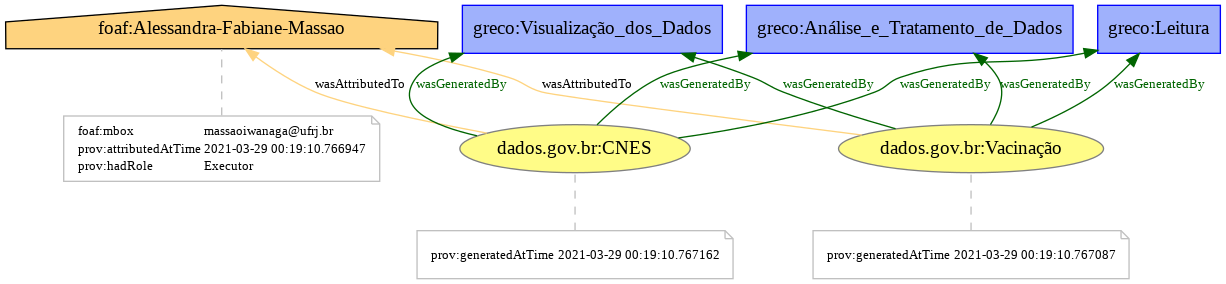

In [ ]:
# Adding Vizualization the provenance graph in the Jupyter notebook
from IPython.display import Image
Image('/content/drive/My Drive/TESI_FCD/'+graph)

## Variáveis gerais do trabalho proposto

In [4]:
## Merge entre os dataFrames de Vacinação e CNES# UFs das regiões norte e sudeste, que serão analisadas no trabalho

UFs = ['RJ', 'SP','MG', 'ES', 'AM', 'AC', 'AP', 'PA', 'RO', 'RR', 'TO']
Norte = ['AM', 'AC', 'AP', 'PA', 'RO', 'RR', 'TO']
Sudeste = ['RJ', 'SP','MG', 'ES']

## Importação e tratamento do DataSet de Vacinação

In [6]:
# Salve o dataset de vacinação no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_vacinacao = pd.read_csv('/content/drive/My Drive/TESI_FCD/part-00000-090405dc-80c4-4889-84c3-a9a390d06947-c000.csv',delimiter=',')

### Exploração inicial do DataSet de Vacinação

In [ ]:
# Código reprodutível - Teste unitário
# assert len(df_vacinacao) == 7908949

In [ ]:
print('Total de registros:',len(df_vacinacao))    # Quantidade de registros do dataset
print('')
print(df_vacinacao.info())  # Informações sobre o dataset 

# Observe o total de linhas (7908949) e o total de colunas (33) do dataset

Total de registros: 7908949

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7908949 entries, 0 to 7908948
Data columns (total 33 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         float64
 8   paciente_endereco_coPais                  float64
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     float64
 13  paciente_nacionalidade_enumN

In [ ]:
df_vacinacao.head(5)        # Visualização dos registros iniciais

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds
0,60aeb975-94ed-4113-a8b0-ac55dbb8ab41-i0b0,433768b2c569be2ff29976dea5cddd0eeb907de38c254e...,79.0,1942-01-28,F,1.0,BRANCA,432225.0,10.0,TUPANDI,BRASIL,RS,95775.0,B,2227428,PREFEITURA MUNICIPAL DE SAO SEBASTIAO DO CAI,CENTRO DE SAUDE DR BRUNO CASSEL,431950.0,SAO SEBASTIAO DO CAI,RS,301,Pessoas de 60 nos ou mais Institucionalizadas,3.0,Pessoas de 60 anos ou mais institucionalizadas,210018A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-16T03:00:00.000Z,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-19 03:20:03
1,b68c468e-8083-4cca-8da1-ea9a8decbaba-i0b0,8499ef2ad9174cee4bd4dac8ae172a706775f4c835cb17...,90.0,1930-09-11,M,2.0,PRETA,430930.0,10.0,GUAIBA,BRASIL,RS,92500.0,B,2225999,PREFEITURA MUNICIPAL DE GUAIBA,UNIDADE BASICA DE SAUDE COHAB,430930.0,GUAIBA,RS,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,210018A,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-11T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-19 16:04:01
2,db74d38d-be6e-4b1a-82d0-e2797c3b55e7-i0b0,1c8b855733d6ea88081712bd74f95ca36bef67ac83b168...,91.0,1929-06-25,F,1.0,BRANCA,316900.0,10.0,TOCANTINS,BRASIL,MG,36512.0,B,2162776,PREFEITURA MUNICIPAL DE TOCANTINS,CENTRO INTEGRADO DE SAUDE DE TOCANTINS,316900.0,TOCANTINS,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,202010031,FUNDACAO BUTANTAN,Organization/61189445000156,2021-02-12T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-15 19:32:10
3,2126698b-2d68-4559-afbd-2cfb665319d8-i0b0,b89cbe103ef31b4bbe4b101e56ad1c3f97a8772a9e440c...,81.0,1939-04-14,F,1.0,BRANCA,240800.0,10.0,MOSSORO,BRASIL,RN,59609.0,B,7172605,PREFEITURA MUNICIPAL DE MOSSORO,UBS DR FRANCISCO NAZARENO P GURGEL,240800.0,MOSSORO,RN,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,4120Z005,FUNDACAO OSWALDO CRUZ,NaN,2021-02-19T00:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-02-20 03:36:33
4,58479a85-603d-4167-898d-e638b4204cc3-i0b0,9a8ae778fc10f5382ce36f1ffb538be3e0df908dd64498...,27.0,1993-12-30,F,1.0,BRANCA,350850.0,10.0,CACAPAVA,BRASIL,SP,12290.0,B,6426247,UNIMED DE CACAPAVA COOPERATIVA DE TRABALHO MEDICO,HOSPITAL UNIMED DE CACAPAVA,350850.0,CACAPAVA,SP,926,Outros,9.0,Trabalhadores de Saúde,200278,Sinovac,NaN,2021-02-04T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,VACIVIDA,2021-02-04 06:02:43


### Eliminação de colunas e linhas que não serão utilizadas - Dataset Vacinação

In [ ]:
# Eliminação das colunas que não serão utilizadas nas análises

df_vacinacao = df_vacinacao.drop(['paciente_endereco_cep','estabelecimento_razaoSocial','estalecimento_noFantasia','vacina_lote','vacina_fabricante_referencia',
                                  'vacina_codigo','sistema_origem'],axis=1)

In [ ]:
# Como o dataset possui dados de todo o Brasil, os estados que não pertencem às regiões selecionadas para análise serão eliminados do dataframe
# Eliminando os estados que não são da região norte nem sudeste
df_vacinacao = df_vacinacao.loc[(df_vacinacao['estabelecimento_uf'].isin(UFs))]

In [ ]:
# Verificação de valores existentes para a coluna 'vacina_descricao_dose'

df_vacinacao['vacina_descricao_dose'].value_counts()

    1ª Dose    3529642
    2ª Dose    1006498
    Dose            29
Name: vacina_descricao_dose, dtype: int64

In [ ]:
# Para o trabalho, só interessam as pessoas que tomaram a primeira dose da vacina, portanto, serão eliminados do dataframe as linhas que não
# se referem à primeira dose da vacinação

df_vacinacao = df_vacinacao.loc[(df_vacinacao['vacina_descricao_dose'].str.strip().str[0] =='1')]

In [ ]:
# Código reprodutível
# assert len(df_vacinacao) == 3529642

In [ ]:
print('Total de registros:',len(df_vacinacao))    # Quantidade de registros do dataset após eliminação de linhas

print('')
print(df_vacinacao.info())                        # Informações sobre o dataset

## É possível observar a redução do número total de linhas (3529642) e do número total de colunas (26) do dataset

Total de registros: 3529642

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3529642 entries, 2 to 7908948
Data columns (total 26 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         float64
 8   paciente_endereco_coPais                  float64
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_nacionalidade_enumNacionalidade  object 
 13  estabelecimento_valor       

### Identificação e tratamento de valores duplicados

#### Identificando valores duplicados e entendimento de suas características

In [ ]:
#Lista todos os registros em que o "paciente_id" apareça mais de 2 vezes
duplicados_mais2 = df_vacinacao[df_vacinacao['paciente_id'].isin(df_vacinacao['paciente_id'].value_counts()[df_vacinacao['paciente_id'].value_counts()>2].index)].sort_values(by=["paciente_id"])

#df_vacinacao.duplicated(subset=['document_id'])
#Lista todos os registros em que o "paciente_id" apareça 2 ou mais vezes
duplicados = df_vacinacao[df_vacinacao.duplicated(subset=['paciente_id'], keep=False)].sort_values(by=["paciente_id"])

In [ ]:
# Lista os estabelecimentos duplicados por estado de vacinação

#Pode-se observar que todos os estados possuem casos de duplicação de registros de vacinação para uma mesma pessoa
duplicados['estabelecimento_uf'].value_counts()

SP    48717
RJ     8676
MG     3280
AM     1008
PA      776
ES      355
AP      314
TO      258
AC      106
RR       53
RO       18
Name: estabelecimento_uf, dtype: int64

In [ ]:
# Quantos são os que tem mais de dois registros duplicados e listagem dos primeiros casos
print(len(duplicados_mais2))
duplicados_mais2.head(10)

129


,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds
4828100,56834bab-f0c1-486b-b309-db6076eb4b3b-i0b0,0c3390b4d0b9a535cb22799c2618053106a61deff30b85...,71.0,1949-06-14,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-23T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-26 18:23:18
3670249,4e09a541-fa26-4daa-8983-2ab84668a1e2-i0b0,0c3390b4d0b9a535cb22799c2618053106a61deff30b85...,71.0,1949-06-14,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-23T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-26 19:18:09
356327,ae5f43ff-7839-4851-b3f2-2183cb62d729-i0b0,0c3390b4d0b9a535cb22799c2618053106a61deff30b85...,71.0,1949-06-14,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-23T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-24 21:45:21
4773242,7f53f141-1d9c-4bcd-8d24-504b67d4ea50-i0b0,0fc334df6e1b34ea25366709ab808fd731e4f9f1c02347...,33.0,1987-08-15,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-22T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-26 18:35:10
1842150,11e92ee3-af7c-46c1-9096-e25235864e32-i0b0,0fc334df6e1b34ea25366709ab808fd731e4f9f1c02347...,33.0,1987-08-15,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-22T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-24 21:17:26
6830377,7d66212c-9a74-4ebe-ba99-4be3e2a79a43-i0b0,0fc334df6e1b34ea25366709ab808fd731e4f9f1c02347...,33.0,1987-08-15,M,99.0,SEM INFORMACAO,313130.0,10.0,IPATINGA,BRASIL,MG,B,2205440,313130.0,IPATINGA,MG,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-22T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-26 19:20:49
4952193,099ddc6f-f845-472a-9f5d-d31cdf6a3545-i0b0,14a64e6664224570bf41963ca5de7bf3a9190cfa6bc507...,91.0,1929-10-24,F,3.0,PARDA,314610.0,10.0,OURO PRETO,BRASIL,MG,B,2213737,314610.0,OURO PRETO,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,SERUM INSTITUTE OF INDIA LTD,2021-02-18T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-20 01:50:43
7816317,3761145f-9f01-414a-803f-adec2e8dd0c4-i0b0,14a64e6664224570bf41963ca5de7bf3a9190cfa6bc507...,91.0,1929-10-24,F,3.0,PARDA,314610.0,10.0,OURO PRETO,BRASIL,MG,B,2213737,314610.0,OURO PRETO,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,SERUM INSTITUTE OF INDIA LTD,2021-02-18T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 20:34:49
3602192,344704ba-0ed3-4cfe-b4f7-0f112cef3a8f-i0b0,14a64e6664224570bf41963ca5de7bf3a9190cfa6bc507...,91.0,1929-10-24,F,3.0,PARDA,314610.0,10.0,OURO PRETO,BRASIL,MG,B,2163438,314610.0,OURO PRETO,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-18T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-25 13:38:14
290660,5ad1dcd0-5094-45f0-8b52-db07c9d12e41-i0b0,1c4c428b27e9a765319f65ded55e7c17124eec57ee0e9e...,44.0,1976-02-26,M,4.0,AMARELA,150060.0,10.0,ALTAMIRA,BRASIL,PA,B,2330385,150060.0,ALTAMIRA,PA,926,Outros,9.0,Trabalhadores de Saúde,F

#### Tratamento de linhas duplicadas

In [ ]:
# Existe mais de um registro de vacinação da primeira dose para um mesmo paciente
# Será mantido o registro com data de aplicação da vacina mais antiga

# O parâmetro inplace=True indica que o dataframe ficará doravante ordenado por "paciente_id", "vacina_dataAplicacao"
df_vacinacao.sort_values(by=["paciente_id", "vacina_dataAplicacao"], inplace=True)

In [ ]:
# Verifica quantos registros contém o campo 'paciente_id' em duplicidade
# Não considera a primeira ocorrência como duplicada

df_vacinacao.duplicated(subset=['paciente_id']).value_counts()

False    3497840
True       31802
dtype: int64

In [ ]:
# Mantém a primeira ocorrência e elimina as demais linhas de mesmo paciente_id
# O parâmetro inplace=True persiste o resultado da operação ao dataframe "df_vacinacao"
df_vacinacao.drop_duplicates(subset=['paciente_id'], keep='first', inplace=True)

# O resultado esperado do comando abaixo é a ausência de valores "True", já que todos serão "False" (não duplicados)
df_vacinacao.duplicated(subset=['paciente_id']).value_counts()

False    3497840
dtype: int64

In [ ]:
#df_vacinacao.info()

#### Testes de verificação da exclusão de duplicados

In [ ]:
# Essa seção poderá ser excluída ao final do trabalho
# Teste de verificação de duplicados pelo índice 
df_vacinacao.loc[2749677]

KeyError: ignored

In [ ]:
# Teste de verificação de duplicados pelo índice 
df_vacinacao.loc[900118]

KeyError: ignored

In [ ]:
# Teste de verificação de duplicados pelo índice 
df_vacinacao.loc[7287947]

document_id                                         0ae8bcc2-1330-4d08-979b-3b3635c7d1bf-i0b0
paciente_id                                 fc004ac33c2997f88d872ca3850c36e4f69b02b2bfcef1...
paciente_idade                                                                             86
paciente_dataNascimento                                                            1934-03-28
paciente_enumSexoBiologico                                                                  M
paciente_racaCor_codigo                                                                    99
paciente_racaCor_valor                                                         SEM INFORMACAO
paciente_endereco_coIbgeMunicipio                                                      330270
paciente_endereco_coPais                                                                   10
paciente_endereco_nmMunicipio                                                          MARICA
paciente_endereco_nmPais                                    

### Tratamento de valores nulos e/ou faltantes

In [ ]:
df_vacinacao.count()  # Quantidade de registros por coluna. 
                      # É possível observar que algumas colunas possuem quatidade inferior de registros, o que indica que será necessário 
                      # tratamento de dados se essas colunas forem necessárias para análise

document_id                                 3497840
paciente_id                                 3497840
paciente_idade                              3497840
paciente_dataNascimento                     3497840
paciente_enumSexoBiologico                  3497840
paciente_racaCor_codigo                     3497840
paciente_racaCor_valor                      3497840
paciente_endereco_coIbgeMunicipio           3479785
paciente_endereco_coPais                    3479849
paciente_endereco_nmMunicipio               3479818
paciente_endereco_nmPais                    3479849
paciente_endereco_uf                        3479785
paciente_nacionalidade_enumNacionalidade    3492812
estabelecimento_valor                       3497840
estabelecimento_municipio_codigo            3497840
estabelecimento_municipio_nome              3497840
estabelecimento_uf                          3497840
vacina_grupoAtendimento_codigo              3497840
vacina_grupoAtendimento_nome                3454705
vacina_categ

In [ ]:
# As colunas listadas abaixo possuem valores nulos, à medida que o código de tratamento for inserido no Notebook, marcar a coluna como tratada
# Ao final, se a coluna não for necessária, ela deverá ser retidada do Dataset e eliminada desta lista

# paciente_endereco_coIbgeMunicipio           3511472 - utilizado para calcular se paciente foi vacinado ou não no município de residência          
# paciente_endereco_coPais                    3511536
# paciente_endereco_nmMunicipio               3511505
# paciente_endereco_nmPais                    3511536
# paciente_endereco_uf                        3511472
# paciente_nacionalidade_enumNacionalidade    3524563
# vacina_grupoAtendimento_nome                3473167
# vacina_categoria_codigo                     3473167 - colocar "não informado"
# vacina_categoria_nome                       3473167 - colocar "não informado"
# vacina_fabricante_nome                      3529442 - colocar "não informado"

# paciente_idade - tratar idades fora da faixa e calcular pela data de nascimento


In [ ]:
# Campos identificados pelo Massao para tratamento de nulos, no entanto, não há mais valores nulos nestes campos
# Se todos concordarem, podemos excluir esse bloco de código
# Alessandra - concordo
# Fabiane - concordo
# Massao - concordo

print(df_vacinacao.estabelecimento_municipio_nome.isna().sum())
print(df_vacinacao.estabelecimento_uf.isna().sum())                          
print(df_vacinacao.paciente_enumSexoBiologico.isna().sum())
print(df_vacinacao.paciente_racaCor_codigo.isna().sum())
print(df_vacinacao.paciente_idade.isna().sum())

0
0
0
0
0


In [ ]:
#In Pandas missing data is represented by two value:
    #None: None is a Python singleton object that is often used for missing data in Python code.
    #NaN : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation
#Pandas treat None and NaN as essentially interchangeable for indicating missing or null values.

#Número de registros (linhas) do arquivo antes da limpeza
#index = df_vacinacao.index
#num_linhas = len(index)
#num_linhas #4536169

#Contando o número de registros (linhas) com o campo "paciente_endereco_nmMunicipio" nulo
#bool_series = pd.isnull(df_vacinacao["paciente_endereco_nmMunicipio"])
#df_vacinacao[bool_series]

#Eliminando linhas em que o campo "paciente_endereco_nmMunicipio" for nulo
#df_vacinacao = df_vacinacao.dropna(subset=['paciente_endereco_nmMunicipio'])
#df_vacinacao = df_vacinacao.dropna(subset=['paciente_endereco_nmMunicipio', 'estabelecimento_municipio_nome'])


In [ ]:
# Código reprodutível
# Incluir alguma validação em relaçao ao conteúdo das colunas que serão trabalhadas, usando o comando assert - ideia: valor mínimo, máximo ou média

###Tratamento da coluna **paciente_racaCor_codigo**

In [ ]:
#df_vacinacao.query('paciente_racaCor_codigo not in ["1", "2", "3", "4", "99"]')

#Aqui verificou-se a existência de outra raça/cor não contemplada no dicionário de dados:
#raça/cor = 5 (indígena) com 77831 registros encontrados
#df_vacinacao.query('paciente_racaCor_codigo  in ["5"]')

#Aqui verificou-se que não existe ocorrência de valor de raça/cor diferente de "1", "2", "3", "4", "5", "99", logo nenhum tratamento foi preciso
df_vacinacao.query('paciente_racaCor_codigo not in ["1", "2", "3", "4", "5", "99"]')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds


In [ ]:
# Massao, a partir de suas análises e conclusões iniciais, sugeri a abordagem abaixo para verificar os valores de paciente_racaCor_codigo
# Veja se está de acordo ou se prefere manter a abordagem inicialmente proposta por você


# Verificando os valores da coluna paciente_racaCor_codigo
df_vacinacao[['paciente_racaCor_codigo', 'paciente_racaCor_valor']].value_counts()

paciente_racaCor_codigo  paciente_racaCor_valor
1.0                      BRANCA                    1369710
99.0                     SEM INFORMACAO            1115435
3.0                      PARDA                      508551
4.0                      AMARELA                    314209
2.0                      PRETA                      129471
5.0                      INDIGENA                    60464
dtype: int64

In [ ]:
# Observa-se que o valor "5" não existe no dicionário de dados, no entanto, ele está associado à raca "INDIGENA"
# Essa informação será adicionada ao dicionário de dados, utilizada nas análises e não será necessário nenhum outro tratamento nos dados

### Tratamento da coluna **paciente_idade**

In [ ]:
# Identificação de outliers dos campos de idade
# Análise inicial dos valores mínimo, máximo e médio de idade
print(df_vacinacao.paciente_idade.min())
print(df_vacinacao.paciente_idade.max())
print(df_vacinacao.paciente_idade.mean())

0.0
221.0
54.552873909399835


In [ ]:
# Como o valor mínimo de idade foi zero, e a vacina só é recomendada para maiores de 18 anos, 
# vamos identificar quantos os casos de vacinação a baixo de 18 anos 
df_idade_menor = df_vacinacao[(df_vacinacao.paciente_idade < 18.0)]
len(df_idade_menor)

1382

In [7]:
# Dos 1376 casos encontrados, quantos são em cada idade:

df_idade_menor['paciente_idade'].value_counts()

NameError: ignored

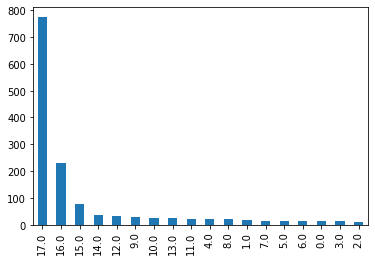

In [ ]:
df_idade_menor['paciente_idade'].value_counts().plot.bar()

In [ ]:
# De forma semelhante, vamos identificar os casos de vacinação em paciente de idade superior a 110 anos
df_idade_maior = df_vacinacao[(df_vacinacao.paciente_idade > 110.0)]
len(df_idade_maior)


1990

In [2]:
# Dos 1986 casos encontrados, quantos são em cada idade:

df_idade_maior['paciente_idade'].sort_values(by=["paciente_idade"]).value_counts()

NameError: ignored

In [ ]:
# Para os casos encontrados de idade menor que 18 anos ou idade maior que 110 anos,
# vamos recalcular a idade a partir da dada de nascimento e data de vacinação

In [ ]:
# 

### Identificar pacientes que foram vacinados fora de seu município de residência

In [ ]:
# Será criada uma coluna booleana para identificar se paciente foi vacinado fora seu município de residência (paciente_vacinado_fora_mun), que receberá os valores:
#    "TRUE" se município de residência do paciente (paciente_endereco_coIbgeMunicipio) <> município do estabelecimento de vacinação (estabelecimento_municipio_codigo)
#    "FALSE" se município de residência do paciente (paciente_endereco_coIbgeMunicipio) = município do estabelecimento de vacinação (estabelecimento_municipio_codigo)

# Para as tuplas onde não existe informação sobre o município de residência do paciente, a nova coluna, para manter a consistência, será preenchida com NaN 

df_vacinacao.loc[(df_vacinacao.paciente_endereco_coIbgeMunicipio != df_vacinacao.estabelecimento_municipio_codigo),'paciente_vacinado_fora_mun'] = True   # Pacientes vacinados fora do município de residência
df_vacinacao.loc[(df_vacinacao.paciente_endereco_coIbgeMunicipio == df_vacinacao.estabelecimento_municipio_codigo),'paciente_vacinado_fora_mun'] = False  # Pacientes vacinados em seu município de residência
df_vacinacao.loc[(df_vacinacao.paciente_endereco_coIbgeMunicipio.isna()),'paciente_vacinado_fora_mun'] = np.nan                                           # Pacientes onde não há informação sobre o município de residência


In [ ]:
# Na listagem abaixo, pode-se observar que a coluna 'paciente_vacinado_fora_mun' foi adicionada e que possui a mesma quantidade de valores válidos que a coluna "paciente_endereco_coIbgeMunicipio" 

df_vacinacao.count()

document_id                                 3529642
paciente_id                                 3529642
paciente_idade                              3529642
paciente_dataNascimento                     3529642
paciente_enumSexoBiologico                  3529642
paciente_racaCor_codigo                     3529642
paciente_racaCor_valor                      3529642
paciente_endereco_coIbgeMunicipio           3511472
paciente_endereco_coPais                    3511536
paciente_endereco_nmMunicipio               3511505
paciente_endereco_nmPais                    3511536
paciente_endereco_uf                        3511472
paciente_nacionalidade_enumNacionalidade    3524563
estabelecimento_valor                       3529642
estabelecimento_municipio_codigo            3529642
estabelecimento_municipio_nome              3529642
estabelecimento_uf                          3529642
vacina_grupoAtendimento_codigo              3529642
vacina_grupoAtendimento_nome                3473167
vacina_categ

## Análises

In [ ]:
# Vacinados fora dos seus Municípios de residência mas no mesmo Estado na região Sudeste

df_vacinacao.query('paciente_endereco_uf in ["ES", "MG", "RJ", "SP"] & paciente_endereco_uf == estabelecimento_uf & paciente_endereco_nmMunicipio != estabelecimento_municipio_nome')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,paciente_vacinado_fora_mun
1029695,97e7cbfe-cb62-4b5d-ace2-c125f5a870aa-i0b0,00001138697adba6248b948c0c34a09cda95077197bd07...,41.0,1979-08-27,M,1.0,BRANCA,352250.0,10.0,ITAPEVI,BRASIL,SP,B,7136889,350570.0,BARUERI,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-01-25T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-25 14:01:50,True
1201362,4b144b87-9333-4a6f-b5c1-4cf84440a046-i0b0,000044f1fe45b4114e222811aa12f58538b641ac8912ba...,33.0,1987-02-13,M,4.0,AMARELA,351640.0,10.0,FRANCO DA ROCHA,BRASIL,SP,B,2086328,352850.0,MAIRIPORA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-29T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-29 15:01:00,True
1378697,e9881139-ddcc-4984-b8e5-a259261143b1-i0b0,000064cc996f9c07a1bc4bc2156f217b1b2cbe1bc64259...,24.0,1996-03-28,F,1.0,BRANCA,313670.0,10.0,JUIZ DE FORA,BRASIL,MG,B,2109476,310560.0,BARBACENA,MG,926,Outros,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-01-22T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 21:20:52,True
5336378,3bfbae1e-b2f9-40ca-a57c-751b671b8830-i0b0,00009ad2c9d2b43d0ac86d4c61e3e8b100a36c791ba257...,30.0,1990-07-23,F,4.0,AMARELA,354410.0,10.0,RIO GRANDE DA SERRA,BRASIL,SP,B,2044501,352940.0,MAUA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-02-04T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-04 15:02:00,True
438620,4a27330d-f18d-47a4-ba8f-cd3c3130e34b-i0b0,0000d6cda89a9d7ee24c4a85b0046a6ec4a4aa7f9a6c73...,45.0,1975-04-14,F,1.0,BRANCA,355030.0,10.0,SAO PAULO,BRASIL,SP,B,7269021,352590.0,JUNDIAI,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-05T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-05 11:02:08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413173,d111e157-11d6-423b-81d9-0a6d4dca252f-i0b0,fffeec0b7112a2fe0dfc5bd164869d3459841436b0f664...,57.0,1963-10-05,F,99.0,SEM INFORMACAO,355030.0,10.0,SAO PAULO,BRASIL,SP,B,2072327,351880.0,GUARULHOS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-18T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-18 03:00:00,True
3054380,b7fa84d7-bb3e-44b4-ad5b-5781966caed7-i0b0,ffff2d5652ff84e55c5359640b64ec15336d108a1b1318...,21.0,1999-06-18,M,1.0,BRANCA,351500.0,10.0,EMBU DAS ARTES,BRASIL,SP,B,2063778,355280.0,TABOAO DA SERRA,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-01T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-01 15:02:00,True
1303890,ac5596a6-f537-47b7-811f-40f3536fb2ae-i0b0,ffff3b16bbae8003cca4c61cdc2cd618c82897565d7869...,26.0,1994-04-17,F,1.0,BRANCA,353110.0,10.0,MONGAGUA,BRASIL,SP,B,2025752,354850.0,SANTOS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-01-25T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-25 10:01:31,True
3362635,f4e048df-6de6-476e-a1a0-31520190f7a1-i0b0,ffff4456a8d6fc335677a22bb3c7ba8846a83abd856309...,45.0,1975-02-20,M,99.0,SEM INFORMACAO,351640.0,10.0,FRANCO DA ROCHA,BRASIL,SP,B,2079186,355030.0,SAO PAULO,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-01-20T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-20 15:01:00,True


In [ ]:
df_vacinacao[['vacina_nome','vacina_fabricante_nome']].value_counts()

vacina_nome                                                vacina_fabricante_nome          
Covid-19-Coronavac-Sinovac/Butantan                        Sinovac                             1297758
                                                           FUNDACAO BUTANTAN                    921139
Vacina Covid-19 - Covishield                               AstraZeneca/Oxford                   671479
                                                           FUNDACAO OSWALDO CRUZ                427321
                                                           University of Oxford/AstraZeneca      67106
Covid-19-Coronavac-Sinovac/Butantan                        Butantan/Sinovac                      52875
                                                           SERUM INSTITUTE OF INDIA LTD          41844
Vacina Covid-19 - Covishield                               SINOVAC LIFE SCIENCE CO LTD           18022
Covid-19-Coronavac-Sinovac/Butantan                        FUNDACAO OSWALDO CRUZ    

In [ ]:
# Quantitativo Total de Vacinados por Sexo Biológico
df_vacinacao['paciente_enumSexoBiologico'].value_counts()

F    2357778
M    1140056
I          6
Name: paciente_enumSexoBiologico, dtype: int64

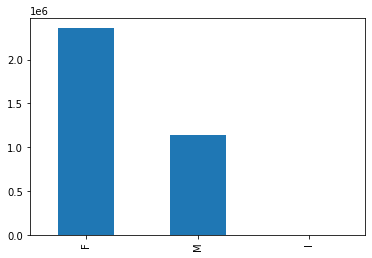

In [ ]:
# Quantitativo Total de Vacinados por Sexo Biológico
df_vacinacao['paciente_enumSexoBiologico'].value_counts().plot.bar()

In [ ]:
# Quantitativo Total de Vacinados por Raça

df_vacinacao['paciente_racaCor_valor'].value_counts()

BRANCA            1369710
SEM INFORMACAO    1115435
PARDA              508551
AMARELA            314209
PRETA              129471
INDIGENA            60464
Name: paciente_racaCor_valor, dtype: int64

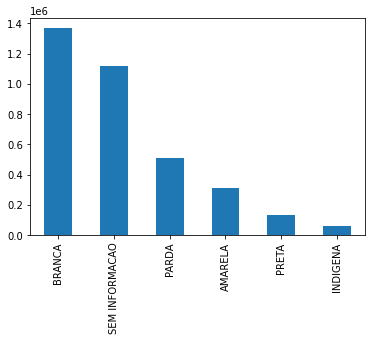

In [ ]:
df_vacinacao['paciente_racaCor_valor'].value_counts().plot.bar()

In [ ]:
# Quantitativo Total de Vacinados por Nome da Vacina
df_vacinacao['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          2313900
Vacina Covid-19 - Covishield                                 1183928
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer         12
Name: vacina_nome, dtype: int64

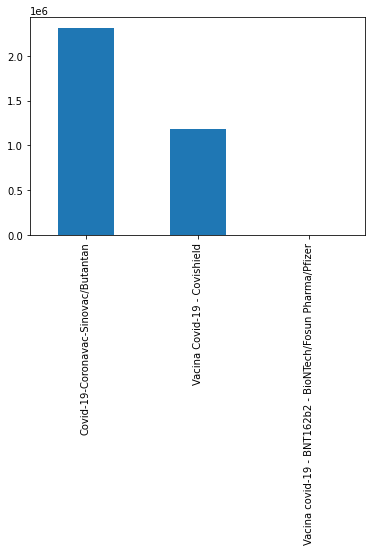

In [ ]:
df_vacinacao['vacina_nome'].value_counts().plot.bar()

In [ ]:
# Quantitativo Total de Vacinados por Categoria

df_vacinacao['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde                             1937488
Faixa Etária                                       1343770
Povos Indígenas                                      85177
Pessoas de 60 anos ou mais institucionalizadas       69791
Pessoas com Deficiência                               8485
Povos e Comunidades Tradicionais                      7141
Forças de Segurança e Salvamento                      1291
Comorbidades                                           852
Pessoas em Situação de Rua                             218
Forças Armadas (membros ativos)                        183
Trabalhadores da Educação                              147
Funcionário do Sistema de Privação de Liberdade         98
População Privada de Liberdade                          34
Trabalhadores Industriais                               24
Trabalhadores Portuários                                 6
Name: vacina_categoria_nome, dtype: int64

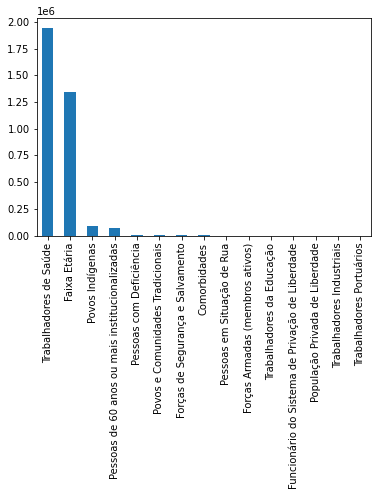

In [ ]:
df_vacinacao['vacina_categoria_nome'].value_counts().plot.bar()

##Teste inicial de gráfico

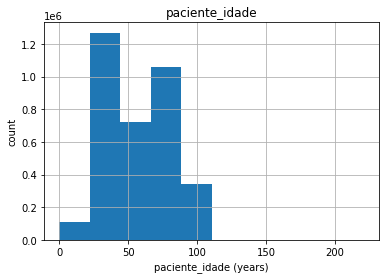

In [ ]:
# Plot 'Idade' variable in a histogram

pd.DataFrame.hist(df_vacinacao[['paciente_idade']])

plt.xlabel('paciente_idade (years)')

plt.ylabel('count')

plt.show()

3497840
1870


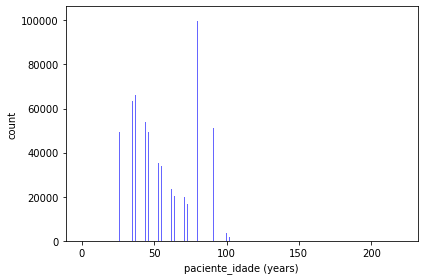

In [ ]:
# Teste de Histograma com outros parâmetros

tamanho = len(df_vacinacao['paciente_idade'])
print(tamanho)
cl = int(round(tamanho**(1/2),0))
print(cl)
plt.xlabel('paciente_idade (years)')
plt.ylabel('count')
plt.hist(df_vacinacao['paciente_idade'], bins = cl, range = (min(df_vacinacao['paciente_idade']), max(df_vacinacao['paciente_idade'])), alpha = 0.6, color = 'b')
plt.tight_layout()
plt.show()


## Importação e tratamento do Dataset de Estabelecimentos de Saúde (CNES)

In [ ]:
# Salve o dataset de CNES no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_cnes = pd.read_csv('/content/drive/My Drive/TESI_FCD/cnes_ativonone.csv',delimiter=',')

### Exploração inicial do DataSet de Estabelecimentos de Saúde (CNES)

In [ ]:
# Código reprodutível
# assert len(df_cnes) == 354804

In [ ]:
print('Total de registros:',len(df_cnes))    # Quantidade de registros do dataset
print('')
print(df_cnes.info())                        # Informações sobre o dataset 

# Observe o total de linhas e o total de colunas (12) do dataset

Total de registros: 354804

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354804 entries, 0 to 354803
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   co_cnes          354804 non-null  int64 
 1   co_ibge          354804 non-null  int64 
 2   no_fantasia      354796 non-null  object
 3   ds_tipo_unidade  354804 non-null  object
 4   tp_gestao        354804 non-null  object
 5   no_logradouro    354804 non-null  object
 6   nu_endereco      354517 non-null  object
 7   no_bairro        354801 non-null  object
 8   co_cep           354804 non-null  int64 
 9   uf               354434 non-null  object
 10  municipio        354434 non-null  object
 11  nu_telefone      279394 non-null  object
dtypes: int64(3), object(9)
memory usage: 32.5+ MB
None


In [ ]:
df_cnes.head(10)        # Visualização dos registros iniciais

,co_cnes,co_ibge,no_fantasia,ds_tipo_unidade,tp_gestao,no_logradouro,nu_endereco,no_bairro,co_cep,uf,municipio,nu_telefone
0,6577687,292240,SECRETARIA DE SAUDE DE MUTUIPE,CENTRAL DE GESTAO EM SAUDE,M,RUA RUY BARBOSA,S/N,CENTRO,45480000,BA,Mutuípe,NaN
1,6578500,500210,REABILIT CONSULTORIO DE FISIOTERAPIA,CLINICA/CENTRO DE ESPECIALIDADE,M,ALMIRANTE BARROSO,S/N,CENTRO,79260000,MS,Bela Vista,NaN
2,6577725,355660,SECRETARIA MUNICIPAL DE SAUDE E HIGIENE DE VER...,CENTRAL DE GESTAO EM SAUDE,M,RUA PAULO GUERREIRO FRANCO,997,CENTRO,17560000,SP,Vera Cruz,NaN
3,6577733,355410,CONS SERGIO LUIZ TEIXEIRA M PERES,CONSULTORIO ISOLADO,M,PCA MONS SILVA BARROS,254,CENTRO,12020070,SP,Taubaté,36351489
4,6577768,410490,LABORATORIO DOFF SOTTA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA DR JORGE XAVIER DA SILVA,1078,CENTRO,84165000,PR,Castro,3232-4854
5,6577806,420245,SAMU BOMBINHAS,UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA ...,M,RUA CACHALOTE,589,MORRINHOS,88215000,SC,Bombinhas,33934363
6,6577830,240260,CENTRO DE ATENCAO PSICOSSOCIAL CAPS II,CENTRO DE ATENCAO PSICOSSOCIAL,M,RUA POETISA DOLORES,13,CENTRO,59570000,RN,Ceará-Mirim,(84)3274-5914
7,6577865,315960,DIMENSAO CLINICA MEDICA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA CEL GABRIEL CAPISTRANO,256,CENTRO,37540000,MG,Santa Rita do Sapucaí,3534713531
8,6577873,355670,JULIANA PEREIRA PERSI,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA ROCINHA,213,CAPELA,13280000,SP,Vinhedo,38764932
9,6577881,231330,CENTRAL DE CONSULTORIOS,CLINICA/CENTRO DE ESPECIALIDADE,M,RUA MAFISA CIDRAO ROCHA,63,CENTRO,63660000,CE,Tauá,88-34371097


In [ ]:
df_cnes.columns

Index(['co_cnes', 'co_ibge', 'no_fantasia', 'ds_tipo_unidade', 'tp_gestao',
       'no_logradouro', 'nu_endereco', 'no_bairro', 'co_cep', 'uf',
       'municipio', 'nu_telefone'],
      dtype='object')

In [ ]:
# Análise inicial dos tipos de estabelecimentos de saúde
df_cnes['ds_tipo_unidade'].value_counts()

CONSULTORIO ISOLADO                                             175140
CLINICA/CENTRO DE ESPECIALIDADE                                  52766
CENTRO DE SAUDE/UNIDADE BASICA                                   38998
UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOLADO)               27067
POSTO DE SAUDE                                                   11345
POLICLINICA                                                       8457
CENTRAL DE GESTAO EM SAUDE                                        6059
HOSPITAL GERAL                                                    5752
UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA DE URGENCIA         4703
FARMACIA                                                          3213
CENTRO DE ATENCAO PSICOSSOCIAL                                    3065
UNIDADE DE VIGILANCIA EM SAUDE                                    3005
POLO ACADEMIA DA SAUDE                                            2523
UNIDADE MOVEL TERRESTRE                                           1460
PRONTO

### Eliminação de colunas e linhas que não serão utilizadas - Dataset Estabelecimentos de Saúde (CNES)

In [ ]:
# Eliminação das colunas que não serão utilizadas nas análises

df_cnes = df_cnes.drop(['co_ibge','no_logradouro','nu_endereco','no_bairro','co_cep', 'municipio','nu_telefone'],axis=1)

In [ ]:
# Como o dataset possui dados de todo o Brasil, os estados que não pertencem às regiões selecionadas para análise serão eliminados do dataframe
df_cnes = df_cnes.loc[(df_cnes['uf'].isin(UFs))]

In [ ]:
# Código reprodutível
# assert len(df_cnes) == 181213

In [ ]:
print('Total de registros:',len(df_cnes))    # Quantidade de registros do dataset após eliminação de linhas
print('')
print(df_cnes.info())                        # Informações sobre o dataset 

## É possível observar a redução do número total de linhas e do número total de colunas (5) do dataset

Total de registros: 183257

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183257 entries, 2 to 354803
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   co_cnes          183257 non-null  int64 
 1   no_fantasia      183252 non-null  object
 2   ds_tipo_unidade  183257 non-null  object
 3   tp_gestao        183257 non-null  object
 4   uf               183257 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.4+ MB
None


### Tratamento de valores nulos e/ou faltantes

In [ ]:
df_cnes.count()        # Quantidade de registros por coluna. 
                      # É possível observar que algumas colunas possuem quatidade inferior de registros, o que indica que será necessário 
                      #    tratamento de dados se essas colunas forem necessárias para análise

co_cnes            183257
no_fantasia        183252
ds_tipo_unidade    183257
tp_gestao          183257
uf                 183257
dtype: int64

In [ ]:
# falta incluir tratamento de nulos e valores faltantes

### Identificação e tratamento de valores duplicados

In [ ]:
#Lista todos os registros em que o "co_cnes" apareça mais de 2 vezes
duplicados_CNESmais2 = df_cnes[df_cnes['co_cnes'].isin(df_cnes['co_cnes'].value_counts()[df_cnes['co_cnes'].value_counts()>2].index)].sort_values(by=["co_cnes"])

In [ ]:
# Quantos são os que tem mais de dois registros duplicados e listagem dos primeiros casos
print(len(duplicados_CNESmais2))
duplicados_CNESmais2.head(10)

0


,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf


In [ ]:
# Pra garantir que não existe duplicidade será feito mais esse teste

# Verifica quantos registros contém o campo 'co_cnes' em duplicidade
# Não considera a primeira ocorrência como duplicada
df_cnes.duplicated(subset=['co_cnes']).value_counts()

False    183257
dtype: int64

## Merge entre os dataFrames de Vacinação e CNES

In [ ]:
df_merge = pd.merge(df_vacinacao, df_cnes, on=None, left_on='estabelecimento_valor', right_on='co_cnes')

In [ ]:
print(df_merge)

                                       document_id  ...  uf
0        62e8806f-e2d0-4372-9b47-1dc359a67bc1-i0b0  ...  SP
1        27823b35-e19f-4a4c-afe2-544eb0d03502-i0b0  ...  SP
2        3812181a-cc29-4e1f-bf95-f2d0064ad839-i0b0  ...  SP
3        0e929adc-effd-4a5e-bac8-b1674a2b1461-i0b0  ...  SP
4        82887c20-0bda-438e-985e-61555b15f7eb-i0b0  ...  SP
...                                            ...  ...  ..
3382287  a3dd3bd4-8aaf-4789-9651-4d8e700c3f09-i0b0  ...  PA
3382288  3029db2c-2fc1-477a-a47e-890837556c22-i0b0  ...  MG
3382289  d2be60d4-d45c-450f-8f6b-0d935a662948-i0b0  ...  SP
3382290  761da6be-0732-4f5d-a8c1-11019238b4d6-i0b0  ...  MG
3382291  bd46ee1e-1628-4102-b40b-441da132d8fc-i0b0  ...  SP

[3382292 rows x 32 columns]


In [ ]:
# Criação do dataframe da região sudeste
df_sudeste = df_merge.query('paciente_endereco_uf in ["ES", "MG", "RJ", "SP"]')

In [ ]:
df_sudeste.count()

document_id                                 2815804
paciente_id                                 2815804
paciente_idade                              2815804
paciente_dataNascimento                     2815804
paciente_enumSexoBiologico                  2815804
paciente_racaCor_codigo                     2815804
paciente_racaCor_valor                      2815804
paciente_endereco_coIbgeMunicipio           2815804
paciente_endereco_coPais                    2815804
paciente_endereco_nmMunicipio               2815804
paciente_endereco_nmPais                    2815804
paciente_endereco_uf                        2815804
paciente_nacionalidade_enumNacionalidade    2811997
estabelecimento_valor                       2815804
estabelecimento_municipio_codigo            2815804
estabelecimento_municipio_nome              2815804
estabelecimento_uf                          2815804
vacina_grupoAtendimento_codigo              2815804
vacina_grupoAtendimento_nome                2788036
vacina_categ

In [ ]:
df_sudeste

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,paciente_vacinado_fora_mun,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
0,62e8806f-e2d0-4372-9b47-1dc359a67bc1-i0b0,000000e609b2d587d14a6982d7e276dc37de728627d216...,29.0,1991-06-04,F,1.0,BRANCA,352900.0,10.0,MARILIA,BRASIL,SP,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 06:01:35,False,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
1,27823b35-e19f-4a4c-afe2-544eb0d03502-i0b0,000163bbe1300e28300dd46372ed912713b9c92fcfdff2...,55.0,1965-11-15,F,1.0,BRANCA,352900.0,10.0,MARILIA,BRASIL,SP,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-06T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-06 04:02:45,False,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
2,3812181a-cc29-4e1f-bf95-f2d0064ad839-i0b0,002797709cb773dc3ff535aaf6a2e4dd23a70e40a78c2c...,33.0,1987-04-19,F,1.0,BRANCA,352900.0,10.0,MARILIA,BRASIL,SP,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-13T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-13 13:02:16,False,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3,0e929adc-effd-4a5e-bac8-b1674a2b1461-i0b0,0048972b9942f71f09b60ab718f14339d24e44255015f5...,58.0,1962-08-03,M,99.0,SEM INFORMACAO,352900.0,10.0,MARILIA,BRASIL,SP,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-11 06:02:54,False,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
4,82887c20-0bda-438e-985e-61555b15f7eb-i0b0,006b61c9a133d493743e624dd17e1cc7a8ec45a73f9d49...,37.0,1983-04-26,F,1.0,BRANCA,352680.0,10.0,LENCOIS PAULISTA,BRASIL,SP,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-13T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-13 14:02:24,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382286,c4e2163d-c00f-4e1d-ac8b-d9321dcb9557-i0b0,f740d8c741f78b60472e1ce9528556ed4bd7e5418b9548...,50.0,1970-05-11,F,1.0,BRANCA,330630.0,10.0,VOLTA REDONDA,BRASIL,RJ,B,2074672,350315.0,ARAPEI,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 07:01:40,True,2074672,UNIDADE BASICA DE SAUDE DE ARAPEI DR HAROLDO V...,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3382288,3029db2c-2fc1-477a-a47e-890837556c22-i0b0,fa4ce5506acc064ac80f257006e8a9dbfebf4ccc663f19...,92.0,1928-10-28,F,99.0,SEM INFORMACAO,312770.0,10.0,GOVERNADOR VALADARES,BRASIL,MG,B,2119021,312770.0,GOVERNADOR VALADARES,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-10T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-24 19:09:36,False,2119021,ESF TURMALINA I,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382289,d2be60d4-d45c-450f-8f6b-0d935a662948-i0b0,fb2aebbcc9f972fb360ca478c71e99cb39e20382afac87...,40.0,1980-06-19,F,1.0,BRANCA,351490.0,10.0,ELIAS FAUSTO,BRASIL,SP,B,6829821,351040.0,CAPIVARI,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-09T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-09 15:02:00,True,6829821,UBS SANTA RITA 

In [ ]:
# Total de vacinados por UF na região sudeste
df_sudeste['paciente_endereco_uf'].value_counts()

SP    1857518
MG     452495
RJ     395395
ES     110396
Name: paciente_endereco_uf, dtype: int64

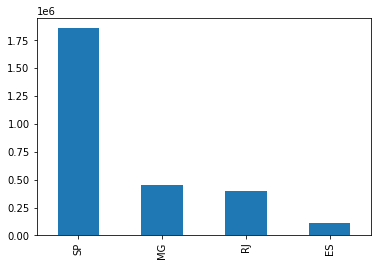

In [ ]:
# Total de vacinados por UF na região sudeste - gráfico
df_sudeste['paciente_endereco_uf'].value_counts().plot.bar()

In [ ]:
# Total de vacinados da região sudeste por categoria
df_sudeste['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde                             1578420
Faixa Etária                                       1124603
Pessoas de 60 anos ou mais institucionalizadas       59915
Povos Indígenas                                       9600
Pessoas com Deficiência                               7762
Povos e Comunidades Tradicionais                      6015
Forças de Segurança e Salvamento                       609
Comorbidades                                           539
Pessoas em Situação de Rua                             204
Forças Armadas (membros ativos)                        163
Trabalhadores da Educação                              119
Funcionário do Sistema de Privação de Liberdade         57
Trabalhadores Industriais                               23
Trabalhadores Portuários                                 4
População Privada de Liberdade                           3
Name: vacina_categoria_nome, dtype: int64

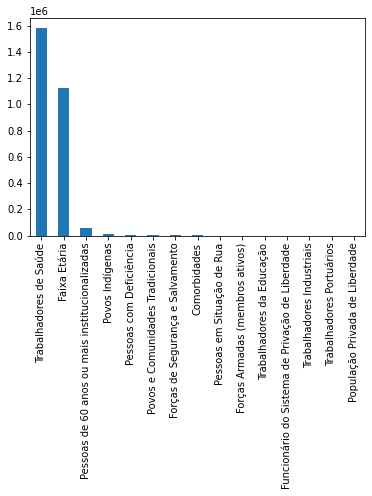

In [ ]:
# Total de vacinados da região sudeste por categoria - gráfico
df_sudeste['vacina_categoria_nome'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Vacinados por Sexo Biológico
df_sudeste['paciente_enumSexoBiologico'].value_counts()

F    1937729
M     878069
I          6
Name: paciente_enumSexoBiologico, dtype: int64

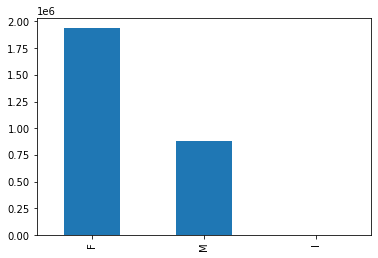

In [ ]:
# Quantitativo de Vacinados por Sexo Biológico - gráfico
df_sudeste['paciente_enumSexoBiologico'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Vacinados por Raça
df_sudeste['paciente_racaCor_valor'].value_counts()

BRANCA            1247233
SEM INFORMACAO     955954
PARDA              296829
AMARELA            195292
PRETA              111572
INDIGENA             8924
Name: paciente_racaCor_valor, dtype: int64

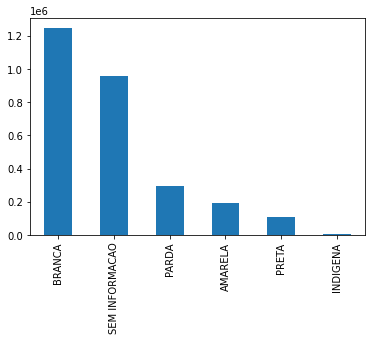

In [ ]:
# Quantitativo de Vacinados por Raça - gráfico
df_sudeste['paciente_racaCor_valor'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina
df_sudeste['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          1859833
Vacina Covid-19 - Covishield                                  955961
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer         10
Name: vacina_nome, dtype: int64

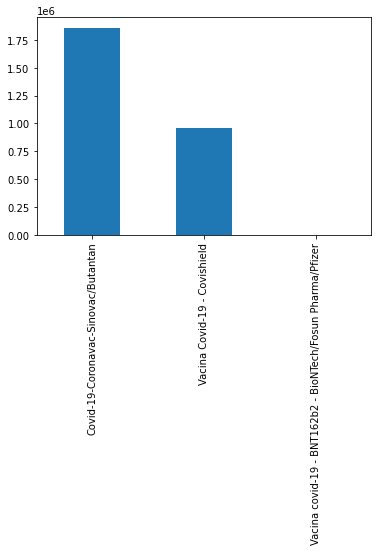

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina - gráfico
df_sudeste['vacina_nome'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de gestão (M - Municipal, E - Estadual, D - Dupla)
df_sudeste['tp_gestao'].value_counts()

M    2549925
E     159148
D     106731
Name: tp_gestao, dtype: int64

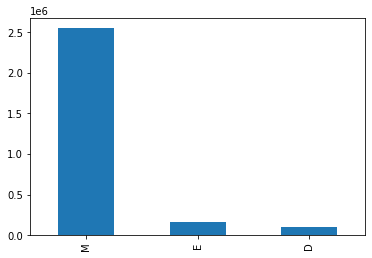

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de gestão (M - Municipal, E - Estadual, D - Dupla) - gráfico
df_sudeste['tp_gestao'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade
df_sudeste['ds_tipo_unidade'].value_counts()

CENTRO DE SAUDE/UNIDADE BASICA                                1970468
HOSPITAL GERAL                                                 451351
POLICLINICA                                                    104206
POSTO DE SAUDE                                                  70595
CLINICA/CENTRO DE ESPECIALIDADE                                 59941
HOSPITAL ESPECIALIZADO                                          43231
UNIDADE DE VIGILANCIA EM SAUDE                                  33221
CENTRAL DE GESTAO EM SAUDE                                      26397
PRONTO ATENDIMENTO                                              16781
UNIDADE MOVEL TERRESTRE                                          8750
PRONTO SOCORRO GERAL                                             6961
UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOLADO)               6815
UNIDADE DE ATENCAO A SAUDE INDIGENA                              5988
CENTRO DE ATENCAO HEMOTERAPIA E OU HEMATOLOGICA                  3443
HOSPITAL/DIA - ISOLA

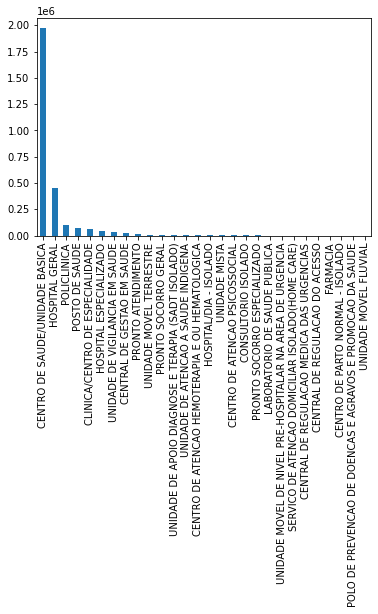

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade - gráfico
df_sudeste['ds_tipo_unidade'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Vacinados por Idade
df_sudeste['paciente_idade'].value_counts()

85.0     88889
80.0     84558
81.0     80013
86.0     79568
82.0     76195
         ...  
122.0        1
123.0        1
127.0        1
128.0        1
164.0        1
Name: paciente_idade, Length: 128, dtype: int64

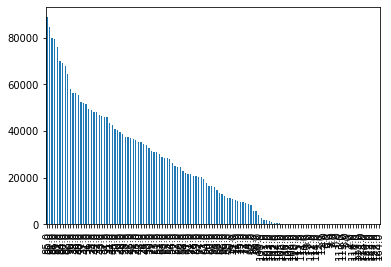

In [ ]:
# Quantitativo de Vacinados por Idade - Alterar para outro tipo de grafico
df_sudeste['paciente_idade'].value_counts().plot.bar()

In [ ]:
# Total de vacinados da região sudeste fora do seu estado de residência :(
df_sudeste.query('paciente_endereco_uf != estabelecimento_uf')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,paciente_vacinado_fora_mun,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
353,a6e79060-0ab4-4eb7-8270-962057b68ca7-i0b0,0f47f165eff0c55cbb40d15ea445be38543a91f28d586e...,20.0,2000-04-22,F,1.0,BRANCA,314100.0,10.0,MATO VERDE,BRASIL,MG,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-06T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-06 06:02:37,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
639,bb2bb81b-4493-46cf-acba-4e782e3cbcec-i0b0,1b401bd819a84b82014356639769ad904145e182321e8d...,39.0,1981-07-20,F,99.0,SEM INFORMACAO,310620.0,10.0,BELO HORIZONTE,BRASIL,MG,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 11:01:44,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
708,08fbce36-138e-4001-b12f-45f48b3f7527-i0b0,1e715a81934c44f9383482d15843280a39404f22da6582...,27.0,1993-01-31,F,1.0,BRANCA,310620.0,10.0,BELO HORIZONTE,BRASIL,MG,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 11:01:18,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
901,58aa3448-023d-4c5b-aaeb-208f01e873a4-i0b0,2651df8835e0f93972e9b7e83cbeb24c79a16650435ff5...,35.0,1985-08-18,M,99.0,SEM INFORMACAO,310620.0,10.0,BELO HORIZONTE,BRASIL,MG,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 06:01:52,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
1040,1abc359c-9e28-402c-a120-0661ddef1f2e-i0b0,2b7cab6f82a087536e3d72254f72f9ff305dce5808d2c5...,40.0,1980-10-20,F,99.0,SEM INFORMACAO,315250.0,10.0,POUSO ALEGRE,BRASIL,MG,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 12:01:52,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381695,cb833e73-4dc6-46cb-bc2d-faacc5da4243-i0b0,7c4ec961ad230b9746679a853a812370e6708e4228865f...,46.0,1974-10-15,F,2.0,PRETA,320500.0,10.0,SERRA,BRASIL,ES,B,6198201,315780.0,SANTA LUZIA,MG,923,Técnico de Enfermagem,9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-04T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-25 18:47:19,True,6198201,UNIDADE DE SAUDE JABAQUARA,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3381752,d03fed94-f7e7-4d8f-a0af-2f14c9944b4e-i0b0,50e84010f270f173b00894cd0ddb309a82acde15e5b189...,93.0,1927-06-26,F,1.0,BRANCA,320150.0,10.0,COLATINA,BRASIL,ES,B,2102994,310110.0,AIMORES,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-19T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-21 14:29:54,True,2102994,PSF PENHA DO CAPIM,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3382022,1ac2d34a-8a2f-4f32-8731-afb989ba1321-i0b0,6703dd71bb489ccd199892cff0198a6ca2c563319453f5...,44.0,1976-11-20,M,99.0,SEM INFORMACAO,317020.0,10.0,UBERLANDIA,BRASIL,MG,B,3512401,355030.0,SAO PAULO,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-01-27T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-27 11:01:32,

In [ ]:
# Criação do dataframe da região norte
df_norte = df_merge.query('paciente_endereco_uf in ["AM", "AC", "AP", "PA", "RO", "RR", "TO"]')

In [ ]:
df_norte.count()

document_id                                 488297
paciente_id                                 488297
paciente_idade                              488297
paciente_dataNascimento                     488297
paciente_enumSexoBiologico                  488297
paciente_racaCor_codigo                     488297
paciente_racaCor_valor                      488297
paciente_endereco_coIbgeMunicipio           488297
paciente_endereco_coPais                    488297
paciente_endereco_nmMunicipio               488297
paciente_endereco_nmPais                    488297
paciente_endereco_uf                        488297
paciente_nacionalidade_enumNacionalidade    487350
estabelecimento_valor                       488297
estabelecimento_municipio_codigo            488297
estabelecimento_municipio_nome              488297
estabelecimento_uf                          488297
vacina_grupoAtendimento_codigo              488297
vacina_grupoAtendimento_nome                479968
vacina_categoria_codigo        

In [ ]:
df_norte

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,paciente_vacinado_fora_mun,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
37,3dfc58d4-862d-42a8-ad3b-fb77b4dcff80-i0b0,01a928b2ace5b2f5c83d31f3f32e752b59e3fad4b7269b...,25.0,1995-08-20,F,3.0,PARDA,150360.0,10.0,ITAITUBA,BRASIL,PA,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 12:01:28,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
425,12a02188-a574-454a-bc3a-c0e5d06d90ef-i0b0,1226eac6a1a9df2832b8e13e1cdac0ca6c02212de2e3cf...,48.0,1972-09-18,F,1.0,BRANCA,150503.0,10.0,NOVO PROGRESSO,BRASIL,PA,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 11:01:32,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
1726,0dee2e04-4a79-4c7e-b48c-838ac4ab5ab3-i0b0,4a3132e90777d778c9119abbd59914d77f1d572e6ddbec...,87.0,1933-11-02,M,1.0,BRANCA,110020.0,10.0,PORTO VELHO,BRASIL,RO,B,2082772,352900.0,MARILIA,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,Sinovac,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-11 15:02:00,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3647,d7948974-f1d1-4114-afcf-f493b1078dbb-i0b0,9cbeef584b47dafe2d60ce90121e9f23f7092a4a37ae59...,85.0,1935-07-25,F,1.0,BRANCA,172100.0,10.0,PALMAS,BRASIL,TO,B,2082772,352900.0,MARILIA,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,Sinovac,2021-02-01T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-01 15:02:00,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3666,d4bb084f-20bd-448a-b04e-b66119431942-i0b0,9de05f3ce92ad84cc53c72c16246f32305d001b0b434bd...,54.0,1966-10-20,M,4.0,AMARELA,130280.0,10.0,MARAA,BRASIL,AM,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-29T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-29 03:00:00,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382266,ef97e480-4723-4060-9636-576fd6b3400c-i0b0,d2120f1bd6c8f608650bf9a54ca88748692569f24ce4e2...,29.0,1991-01-29,M,3.0,PARDA,130260.0,10.0,MANAUS,BRASIL,AM,B,3748774,130115.0,CAREIRO DA VARZEA,AM,923,Técnico de Enfermagem,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-01-24T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-06 21:42:44,True,3748774,UNIDADE BASICA DE SAUDE ANTONIO BENTO MIGUES,POSTO DE SAUDE,M,AM
3382267,95d2f604-3a40-4119-9061-d23678e94d66-i0b0,d3604f31f4a6a7e744a42536c15c7185648341b1603ab8...,74.0,1946-07-14,M,4.0,AMARELA,130270.0,10.0,MANICORE,BRASIL,AM,B,2708868,130270.0,MANICORE,AM,0,NaN,NaN,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-19T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 20:31:21,False,2708868,CENTRO DE SAUDE MAE LAURINDA,CENTRO DE SAUDE/UNIDADE BASICA,M,AM
3382268,6ae9f792-a3fd-4959-9d7b-f351b7f39887-i0b0,d5609f55139e9df810ef79744aed82807d50d158cadea1...,73.0,1947-05-05,F,4.0,AMARELA,130270.0,10.0,MANICORE,BRASIL,AM,B,2708868,130270.0,MANICORE,AM,0,NaN,NaN,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-19T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 20:31:21,False,2708868,CENTRO DE SAUDE MAE LAURINDA

In [ ]:
# Total de vacinados por UF na região norte
df_norte['paciente_endereco_uf'].value_counts()

AM    211314
PA    139671
TO     45647
RO     33705
AC     21271
RR     19496
AP     17193
Name: paciente_endereco_uf, dtype: int64

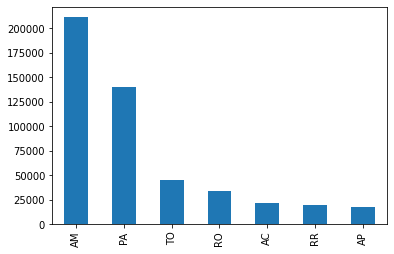

In [ ]:
# Total de vacinados por UF na região norte - gráfico
df_norte['paciente_endereco_uf'].value_counts().plot.bar()

In [ ]:
# Total de vacinados da região norte por categoria
df_norte['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde                             229886
Faixa Etária                                       172640
Povos Indígenas                                     69877
Pessoas de 60 anos ou mais institucionalizadas       5747
Forças de Segurança e Salvamento                      605
Povos e Comunidades Tradicionais                      573
Comorbidades                                          291
Pessoas com Deficiência                               265
Funcionário do Sistema de Privação de Liberdade        32
População Privada de Liberdade                         24
Trabalhadores da Educação                              14
Forças Armadas (membros ativos)                        12
Trabalhadores Portuários                                1
Trabalhadores Industriais                               1
Name: vacina_categoria_nome, dtype: int64

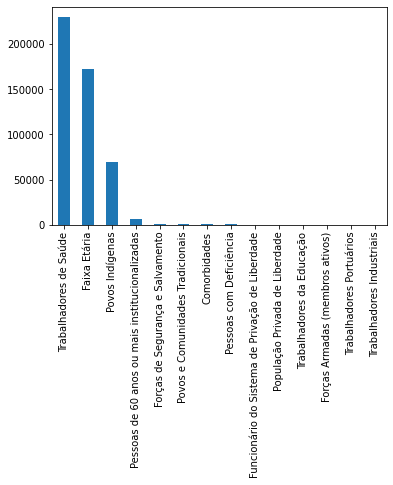

In [ ]:
# Total de vacinados da região norte por categoria - gráfico
df_norte['vacina_categoria_nome'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Vacinados por Sexo Biológico
df_norte['paciente_enumSexoBiologico'].value_counts()

F    291427
M    196870
Name: paciente_enumSexoBiologico, dtype: int64

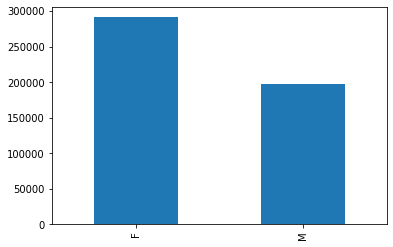

In [ ]:
# Quantitativo de Vacinados por Sexo Biológico - gráfico
df_norte['paciente_enumSexoBiologico'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Vacinados por Raça
df_norte['paciente_racaCor_valor'].value_counts()

PARDA             181759
SEM INFORMACAO     95489
AMARELA            94752
BRANCA             56984
INDIGENA           48284
PRETA              11029
Name: paciente_racaCor_valor, dtype: int64

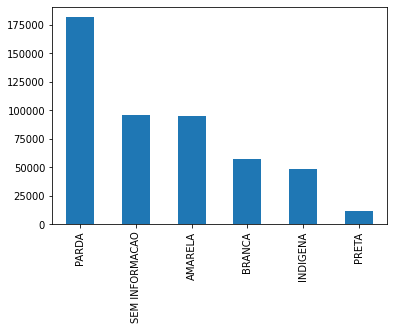

In [ ]:
# Quantitativo de Vacinados por Raça - gráfico
df_norte['paciente_racaCor_valor'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina
df_norte['vacina_nome'].value_counts()

Covid-19-Coronavac-Sinovac/Butantan                          318643
Vacina Covid-19 - Covishield                                 169652
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer         2
Name: vacina_nome, dtype: int64

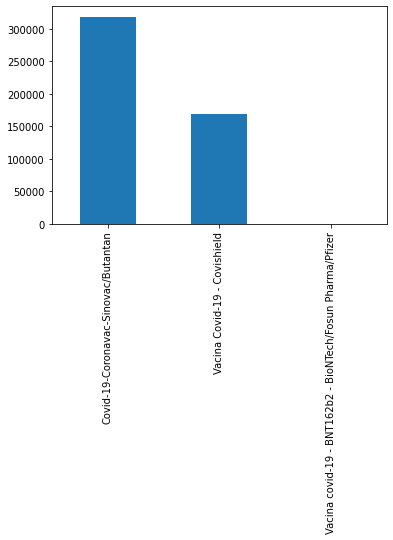

In [ ]:
# Quantitativo de Vacinados por Nome da Vacina - gráfico
df_norte['vacina_nome'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de gestão (M - Municipal, E - Estadual, D - Dupla)
df_norte['tp_gestao'].value_counts()

M    445951
E     28111
D     14235
Name: tp_gestao, dtype: int64

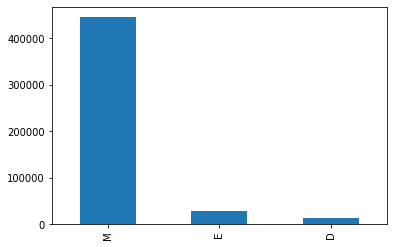

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de gestão (M - Municipal, E - Estadual, D - Dupla) - gráfico
df_norte['tp_gestao'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade
df_norte['ds_tipo_unidade'].value_counts()

CENTRO DE SAUDE/UNIDADE BASICA                                  252957
UNIDADE DE ATENCAO A SAUDE INDIGENA                              71406
HOSPITAL GERAL                                                   58340
UNIDADE DE VIGILANCIA EM SAUDE                                   56656
POSTO DE SAUDE                                                   17964
UNIDADE MISTA                                                     5592
HOSPITAL ESPECIALIZADO                                            5092
CENTRAL DE GESTAO EM SAUDE                                        4990
PRONTO ATENDIMENTO                                                4148
CLINICA/CENTRO DE ESPECIALIDADE                                   2466
UNIDADE MOVEL TERRESTRE                                           2242
PRONTO SOCORRO ESPECIALIZADO                                      1858
PRONTO SOCORRO GERAL                                               895
POLICLINICA                                                        867
CENTRA

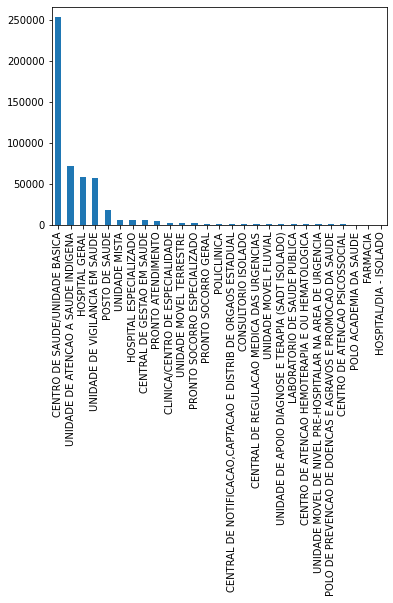

In [ ]:
# Quantitativo de Estabelecimentos de saúde por tipo de unidade - gráfico
df_norte['ds_tipo_unidade'].value_counts().plot.bar()

In [ ]:
# Quantitativo de Vacinados por Idade
df_norte['paciente_idade'].value_counts()

80.0     11362
81.0     10979
82.0     10417
83.0      9980
70.0      9948
         ...  
120.0        1
116.0        1
2.0          1
119.0        1
127.0        1
Name: paciente_idade, Length: 122, dtype: int64

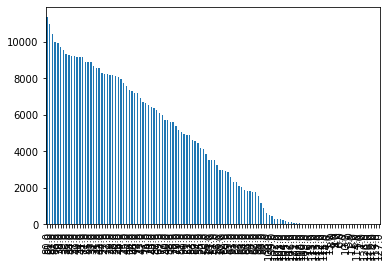

In [ ]:
# Quantitativo de Vacinados por Idade - Alterar para outro tipo de gráfico
df_norte['paciente_idade'].value_counts().plot.bar()

In [ ]:
# Total de vacinados da região norte fora do seu estado de residência :(
df_norte.query('paciente_endereco_uf != estabelecimento_uf')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,paciente_vacinado_fora_mun,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
37,3dfc58d4-862d-42a8-ad3b-fb77b4dcff80-i0b0,01a928b2ace5b2f5c83d31f3f32e752b59e3fad4b7269b...,25.0,1995-08-20,F,3.0,PARDA,150360.0,10.0,ITAITUBA,BRASIL,PA,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 12:01:28,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
425,12a02188-a574-454a-bc3a-c0e5d06d90ef-i0b0,1226eac6a1a9df2832b8e13e1cdac0ca6c02212de2e3cf...,48.0,1972-09-18,F,1.0,BRANCA,150503.0,10.0,NOVO PROGRESSO,BRASIL,PA,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-30T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-30 11:01:32,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
1726,0dee2e04-4a79-4c7e-b48c-838ac4ab5ab3-i0b0,4a3132e90777d778c9119abbd59914d77f1d572e6ddbec...,87.0,1933-11-02,M,1.0,BRANCA,110020.0,10.0,PORTO VELHO,BRASIL,RO,B,2082772,352900.0,MARILIA,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,Sinovac,2021-02-11T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-11 15:02:00,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3647,d7948974-f1d1-4114-afcf-f493b1078dbb-i0b0,9cbeef584b47dafe2d60ce90121e9f23f7092a4a37ae59...,85.0,1935-07-25,F,1.0,BRANCA,172100.0,10.0,PALMAS,BRASIL,TO,B,2082772,352900.0,MARILIA,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,Sinovac,2021-02-01T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-01 15:02:00,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3666,d4bb084f-20bd-448a-b04e-b66119431942-i0b0,9de05f3ce92ad84cc53c72c16246f32305d001b0b434bd...,54.0,1966-10-20,M,4.0,AMARELA,130280.0,10.0,MARAA,BRASIL,AM,B,2082772,352900.0,MARILIA,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-01-29T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-01-29 03:00:00,True,2082772,UBS CASCATA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381259,16362c52-30a0-4915-8066-c0eb7072e549-i0b0,99436c7a1197a336d0a187b28479fb12460aa2ae55db0d...,83.0,1937-10-20,F,3.0,PARDA,130260.0,10.0,MANAUS,BRASIL,AM,B,6444288,150360.0,ITAITUBA,PA,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-12T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-17 13:34:02,True,6444288,UNIDADE BASICA DE SAUDE CREPURIZAO,CENTRO DE SAUDE/UNIDADE BASICA,M,PA
3381463,c6aab6d6-545d-4fd4-87f2-0619c87749ac-i0b0,92aeaf90d6fa94adc2261c10b1f837c79664aea2a4cc55...,46.0,1974-04-08,M,4.0,AMARELA,170210.0,10.0,ARAGUAINA,BRASIL,TO,B,2318911,150840.0,XINGUARA,PA,921,Segurança,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-01-29T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-01 15:27:24,True,2318911,UNIDADE DE ESF MARIA DO SOCORRO,CENTRO DE SAUDE/UNIDADE BASICA,M,PA
3381514,6985ffe2-77c3-43a2-be81-b117ae0f9925-i0b0,9cd89af3b0e731a37a68ac626d26db24fe1eae8bde1925...,27.0,1993-09-08,F,4.0,AMARELA,170210.0,10.0,ARAGUAINA,BRASIL,TO,B,2323001,150543.0,OURILANDIA DO NORTE,PA,916,Odontologista,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-01-22T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-02 13:41:20